<a href="https://colab.research.google.com/github/bukshalishah/Deep-Learning/blob/master/Boston_Housing_Price_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Modules

from keras.datasets import boston_housing
from keras import layers
from keras import models
import numpy as np

Using TensorFlow backend.


In [2]:
# Load data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [3]:
train_data.shape #Checking shape of train data

(404, 13)

In [5]:
test_data.shape #Checking shape of test data

(102, 13)

In [15]:
print(len(train_targets)) # Length of targets

404


In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
# Build a Model
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [9]:
# K-fold cross validation

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

# Prepares the validation data: data from partition #k

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i* num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  
# Prepares the training data: data from all other partitions
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
      axis = 0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  

  model = build_model()   # Builds the Keras model (already compiled)
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)  # Trains the model ('Batch_size = 1' use in regression problem)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) # Evaluates the model on the validation data
  
  all_scores.append(val_mae) #Updating all_scores list
        

processing fold # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
303/303 [==============================] - 3s 11ms/step - loss: 202.3814 - mean_absolute_error: 10.7722
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 30.2373 - mean_absolute_error: 3.8334
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 21.3092 - mean_absolute_error: 3.1753
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 18.2486 - mean_absolute_error: 2.8959
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 16.6024 - mean_absolute_error: 2.6640
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 15.4888 - mean_absolute_error: 2.5713
Epoch 7/100
303/303 [==============================] - 1s 3ms/step - loss: 14.2158 - mean_absolute_error: 2.5346
Epoch 8/100
303/303 [==============================] - 1s 3ms/step

In [13]:
all_scores

[2.0581326413862775, 2.2001309324019025, 2.8750618802438868, 2.410775157484678]

In [14]:
np.mean(all_scores) #Mean of all_scores

2.386025152879186

In [20]:
# Saving the validation logs at each fold

num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                      train_data[(i + 1) * num_val_samples:]],
                                      axis=0)
  
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                         train_targets[(i + 1) * num_val_samples:]],
                                         axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                     epochs=num_epochs,
                     batch_size=1,
                     verbose=1)
  
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)


processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 4ms/step - loss: 172.3064 - mean_absolute_error: 9.9995 - val_loss: 30.3668 - val_mean_absolute_error: 3.8352
Epoch 2/500
303/303 [==============================] - 1s 4ms/step - loss: 26.5979 - mean_absolute_error: 3.5060 - val_loss: 20.3579 - val_mean_absolute_error: 2.7898
Epoch 3/500
303/303 [==============================] - 1s 4ms/step - loss: 19.3642 - mean_absolute_error: 2.8775 - val_loss: 17.4801 - val_mean_absolute_error: 2.5965
Epoch 4/500
303/303 [==============================] - 1s 4ms/step - loss: 17.6777 - mean_absolute_error: 2.7136 - val_loss: 14.9171 - val_mean_absolute_error: 2.3453
Epoch 5/500
303/303 [==============================] - 1s 4ms/step - loss: 16.0331 - mean_absolute_error: 2.6369 - val_loss: 15.0310 - val_mean_absolute_error: 2.4165
Epoch 6/500
303/303 [==============================] - 1s 4ms/step - loss: 14.7644 - mean_absolute

In [0]:
# Building the history of successive mean K-fold validation scores

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

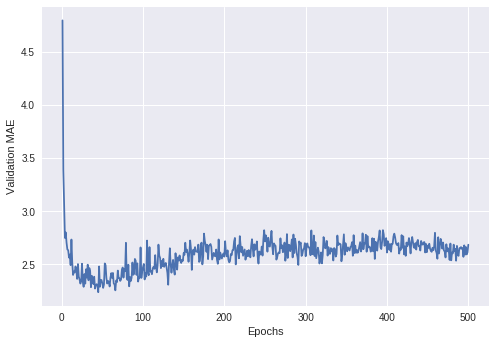

In [25]:
import matplotlib.pyplot as plt

# Plotting validation scores

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

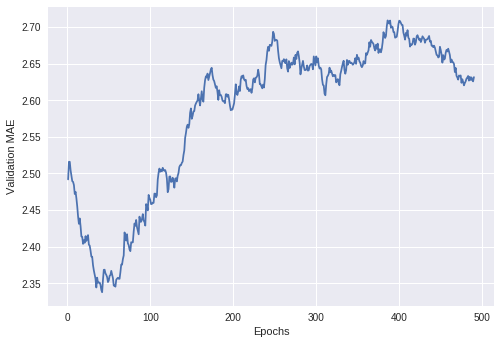

In [29]:
# Plotting validation scores, excluding the first 10 data points

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [33]:
# Training the final model

model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=1)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 0s 1ms/step - loss: 500.1464 - mean_absolute_error: 20.4574
Epoch 2/80
404/404 [==============================] - 0s 207us/step - loss: 288.3008 - mean_absolute_error: 14.9485
Epoch 3/80
404/404 [==============================] - 0s 203us/step - loss: 125.4138 - mean_absolute_error: 8.9337
Epoch 4/80
404/404 [==============================] - 0s 208us/step - loss: 61.4283 - mean_absolute_error: 5.8589
Epoch 5/80
404/404 [==============================] - 0s 221us/step - loss: 38.1688 - mean_absolute_error: 4.5737
Epoch 6/80
404/404 [==============================] - 0s 196us/step - loss: 28.3206 - mean_absolute_error: 3.7913
Epoch 7/80
404/404 [==============================] - 0s 211us/step - loss: 23.6306 - mean_absolute_error: 3.4377
Epoch 8/80
404/404 [==============================] - 0s 202us/step - loss: 20.7172 - mean_absolute_error: 3.1924
Epoch 9/80
404/404 [==============================] - 0s 201us/step - loss: 18.3992 -

In [44]:
print(str(test_mae_score) , ', ' + ' $' + str(test_mae_score * 1000))

2.7119817546769682 ,  $2711.981754676968
